In [21]:
import pandas as pd
from pandas.tools import plotting
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import sys
from datetime import date, datetime

In [22]:
#Import sales, store
sales = pd.read_csv('train.csv', dtype={'StateHoliday': np.character})
stores = pd.read_csv('store.csv')

In [25]:
print (sales.shape)
print (stores.shape)

(1017209, 9)
(1115, 10)


In [26]:
SS = pd.merge(sales, stores, on='Store')

In [30]:
SS['Open'] = SS['Open'].apply(lambda x: 0 if np.isnan(x) else x)

SS['has_sales'] = SS['Sales'].apply(lambda x: x > 0)
SS['has_customers'] = SS['Customers'].apply(lambda x: x != 0)

date_format = '%d/%m/%Y'
if '-' in SS.at[0, 'Date']:
    date_format = '%Y-%m-%d'
    #temporary column that have the date parsed in order to speed up further processing
    SS['_date'] = SS['Date'].apply(lambda x: datetime.strptime(x, date_format))

    SS['month'] = SS['_date'].apply(lambda x: x.month)
    SS['week_of_month'] = SS['_date'].apply(lambda x: x.isocalendar()[1])
    SS['year'] = SS['_date'].apply(lambda x: x.isocalendar()[0])

In [31]:
Group_open_cust = SS.groupby(['Open', 'has_customers'])

print("Stores Open or Closed")
print(Group_open_cust.agg({'Sales': np.sum, 'Open': np.sum}))
#We see 52 stores which are open with no customer and no sales , this is an error in the data

Stores Open or Closed
                         Sales    Open
Open has_customers                    
0    False                   0       0
1    False                   0      52
     True           5873180623  844340


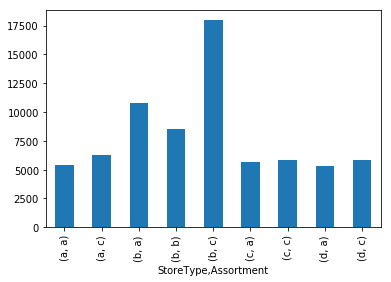

In [33]:
Sta_S = SS.groupby(['StoreType', 'Assortment']).Sales.mean()
Sta_S.plot('bar')
assortments_types = stores.groupby(['StoreType', 'Assortment']).Store.count()

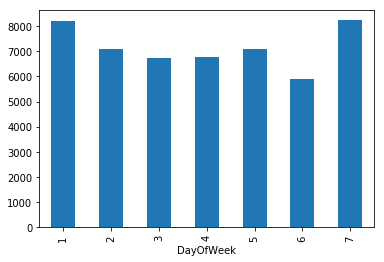

In [35]:
dow = SS[(SS['Sales']!=0)].groupby(['DayOfWeek']).Sales.mean()
dow.plot('bar')

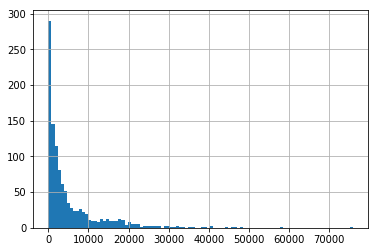

In [37]:
stores['CompetitionDistance'].hist(bins=100) 
#Most store are in a very close competition

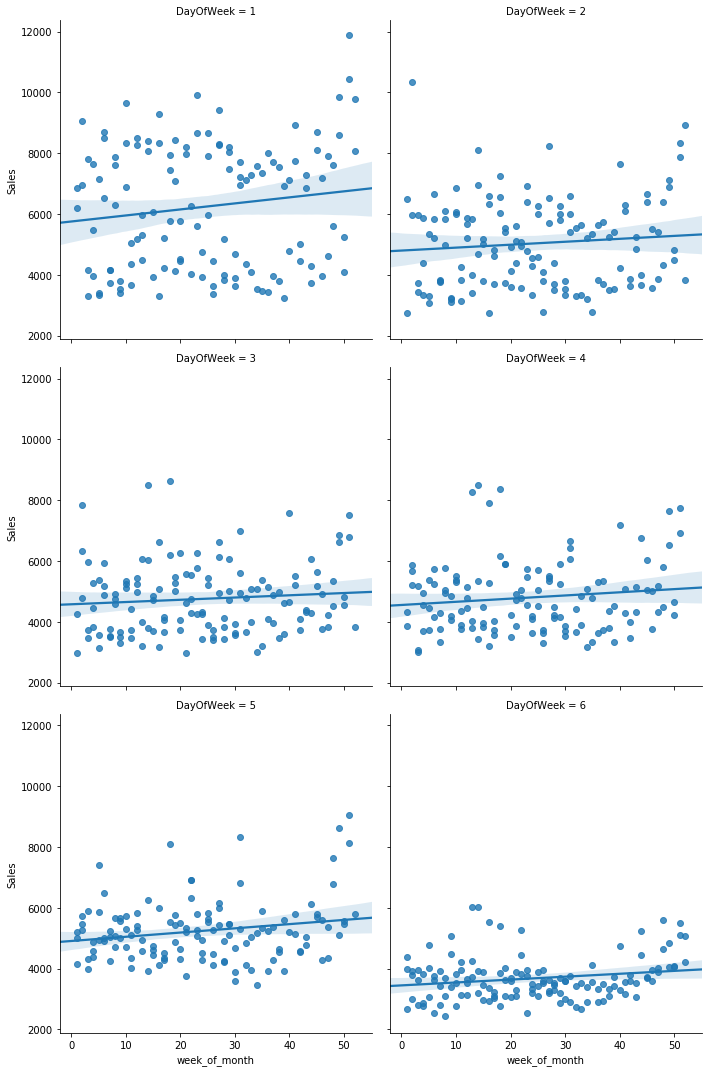

In [39]:
sns.lmplot(x='week_of_month', y='Sales', data=SS[(SS['Store']==664) & (SS['Sales'] !=0)], 
           col='DayOfWeek', col_wrap=2);

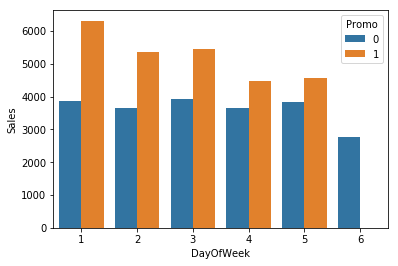

In [40]:
#Promotion effects for single store on a specific moth and year
store, month, year = 945, 6, 2015
g_sym = SS.groupby(['Store', 'year', 'month'])
g_store = g_sym.get_group((store, year, month))[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo']]
#remove all 0 sales, closed store and reshape
d = g_store[ (g_store.DayOfWeek != 7) & (g_store.Open != 0)].groupby(['DayOfWeek', 'Promo']).Sales.mean().to_frame()
d = d.reset_index()
sns.barplot(data = d, x='DayOfWeek', y='Sales', hue='Promo')

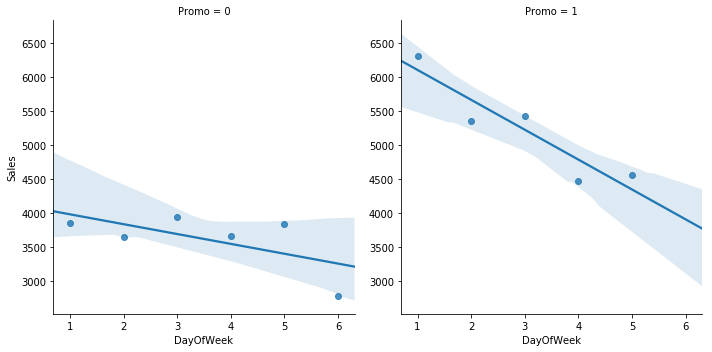

In [41]:
# Plot sales via date of week on both promo/non-promo days
sns.lmplot(data = d, x='DayOfWeek', y='Sales', col='Promo')